In [11]:
from pandas.core.ops.array_ops import isna
import os
os.chdir("/content/drive")

import pandas as pd

movies = pd.read_csv('/content/drive/MyDrive/820/21Jan2023- 820- Movie metadata.csv')
movies = pd.DataFrame(data = movies)

col_names = ["Color", "Director Name", "# Critic Reviews", "Duration", "# Director Likes", "# Actor 1 Likes", "Actor 2 Name", "# Actor 1 Likes", "Gross", "Genres", 
             "Actor 1 Name", "Movie Title", "# Users Voted", "# Cast Likes", "Actor 3 Name", "# FB Poster", "Plot Keywords", "Movie Link", "# Users for Reviews", "Langauge", "Country",
             "Content Rating", "Budget", "Title Year", "# Actor 2 Likes", "IMDB Score", "Aspect Ratio", "# Movie Likes"]
movies.columns = col_names
#REMOVE MISSING DATA:
movies = movies.dropna()
pd.set_option('float_format', '{:.2f}'.format)
movies.head()

,Color,Director Name,# Critic Reviews,Duration,# Director Likes,# Actor 1 Likes,Actor 2 Name,# Actor 1 Likes,Gross,Genres,...,# Users for Reviews,Langauge,Country,Content Rating,Budget,Title Year,# Actor 2 Likes,IMDB Score,Aspect Ratio,# Movie Likes
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,Action|Adventure|Fantasy|Sci-Fi,...,3054.00,English,USA,PG-13,237000000.00,2009.00,936.00,7.90,1.78,33000
1,Color,Gore Verbinski,302.00,169.00,563.00,1000.00,Orlando Bloom,40000.00,309404152.00,Action|Adventure|Fantasy,...,1238.00,English,USA,PG-13,300000000.00,2007.00,5000.00,7.10,2.35,0
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,11000.00,200074175.00,Action|Adventure|Thriller,...,994.00,English,UK,PG-13,245000000.00,2015.00,393.00,6.80,2.35,85000
3,Color,Christopher Nolan,813.00,164.00,22000.00,23000.00,Christian Bale,27000.00,448130642.00,Action|Thriller,...,2701.00,English,USA,PG-13,250000000.00,2012.00,23000.00,8.50,2.35,164000
5,Color,Andrew Stanton,462.00,132.00,475.00,530.00,Samantha Morton,640.00,73058679.00,Action|Adventure|Sci-Fi,...,738.00,English,USA,PG-13,263700000.00,2012.00,632.00,6.60,2.35,24000


In [12]:
from pandas.core.groupby.grouper import DataFrame
#CREATE REVENUE CATEGORIES:

gross_Describe = movies['Gross'].describe()
gross_Describe

#Revenue Classes:
# $0 - 24.99M
# $25 - 99.99M
# $100 - 249.99M
# $250 - 499.99M
# $500M - 1000000000

#Assign each movie to a REVENUE CLASS:
x = pd.cut(movies.Gross, bins = [0, 24999999, 99999999,249999999, 499999999, 1000000000], 
       labels = ['Class One', 'Class Two', 'Class Three', 'Class Four', 'Class Five'])
movies['Classes'] = x


In [13]:
# ENCODE CATEGORICAL VARIABLES TO NUMERICAL LABEL ENCODING:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
one_hot_encoder = preprocessing.OneHotEncoder()

movies['Director Name'] = label_encoder.fit_transform(movies['Director Name'])
movies['Color'] = label_encoder.fit_transform(movies['Color'])
movies['Actor 2 Name'] = label_encoder.fit_transform(movies['Actor 2 Name'])
movies['Genres'] = label_encoder.fit_transform(movies['Genres'])
movies['Langauge'] = label_encoder.fit_transform(movies['Langauge'])
movies['Country'] = label_encoder.fit_transform(movies['Country'])
movies['Content Rating'] = label_encoder.fit_transform(movies['Content Rating'])
movies['Title Year'] = label_encoder.fit_transform(movies['Title Year'])
movies['Actor 1 Name'] = label_encoder.fit_transform(movies['Actor 1 Name'])
movies['Actor 3 Name'] = label_encoder.fit_transform(movies['Actor 3 Name'])

In [14]:
#DROP UNWANTED FEATURES:
movies = movies.drop(['Plot Keywords', 'Movie Link', 'Movie Title'], axis = 1)

In [15]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#SEPARATE INTO TRAINING AND TEST SETS:

X = movies.drop(['Classes'], axis = 1)
y = movies.pop('Classes')

In [7]:
movies.head()

,Color,Director Name,# Critic Reviews,Duration,# Director Likes,# Actor 1 Likes,Actor 2 Name,# Actor 1 Likes,Gross,Genres,...,# Users for Reviews,Langauge,Country,Content Rating,Budget,Title Year,# Actor 2 Likes,IMDB Score,Aspect Ratio,# Movie Likes
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,1000.00,760505847.00,Action|Adventure|Fantasy|Sci-Fi,...,3054.00,English,USA,PG-13,237000000.00,2009.00,936.00,7.90,1.78,33000
1,Color,Gore Verbinski,302.00,169.00,563.00,1000.00,Orlando Bloom,40000.00,309404152.00,Action|Adventure|Fantasy,...,1238.00,English,USA,PG-13,300000000.00,2007.00,5000.00,7.10,2.35,0
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,11000.00,200074175.00,Action|Adventure|Thriller,...,994.00,English,UK,PG-13,245000000.00,2015.00,393.00,6.80,2.35,85000
3,Color,Christopher Nolan,813.00,164.00,22000.00,23000.00,Christian Bale,27000.00,448130642.00,Action|Thriller,...,2701.00,English,USA,PG-13,250000000.00,2012.00,23000.00,8.50,2.35,164000
5,Color,Andrew Stanton,462.00,132.00,475.00,530.00,Samantha Morton,640.00,73058679.00,Action|Adventure|Sci-Fi,...,738.00,English,USA,PG-13,263700000.00,2012.00,632.00,6.60,2.35,24000


In [17]:
#NORMALIZE DATA
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_Movies = pd.DataFrame(scaler.fit_transform(movies))
movies = normalized_Movies
normalized_Movies.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.00,0.37,0.89,0.48,0.00,0.04,0.46,0.00,1.00,0.12,...,0.60,0.27,0.98,0.64,0.02,0.90,0.01,0.82,0.04,0.09
1,1.00,0.32,0.37,0.45,0.02,0.04,0.73,0.06,0.41,0.11,...,0.24,0.27,0.98,0.64,0.02,0.88,0.04,0.71,0.08,0.00
2,1.00,0.84,0.74,0.38,0.00,0.01,0.82,0.02,0.26,0.14,...,0.20,0.27,0.95,0.64,0.02,0.99,0.00,0.68,0.08,0.24
3,1.00,0.15,1.00,0.43,0.96,1.00,0.17,0.04,0.59,0.33,...,0.53,0.27,0.98,0.64,0.02,0.95,0.17,0.90,0.08,0.47
4,1.00,0.04,0.57,0.32,0.02,0.02,0.84,0.00,0.10,0.14,...,0.15,0.27,0.98,0.64,0.02,0.95,0.00,0.65,0.08,0.07


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.8, shuffle = True)
print(y_test)

2588      Class One
1867    Class Three
3699      Class Two
800       Class One
2138      Class Two
           ...     
3588      Class Two
3071      Class Two
1460      Class Two
1438      Class Two
1657      Class Two
Name: Classes, Length: 752, dtype: category
Categories (5, object): ['Class One' < 'Class Two' < 'Class Three' < 'Class Four' < 'Class Five']


In [56]:
#DEFINE AND TRAIN MODEL ON TRAINING SET
from sklearn import linear_model
movie_Model = linear_model.LogisticRegression(multi_class = 'ovr', solver = 'liblinear')
movie_Model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(multi_class='ovr', solver='liblinear')

In [57]:
from sklearn.metrics._plot.precision_recall_curve import average_precision_score
# TEST MODEL
predictions = movie_Model.predict(X_test)
score = movie_Model.score(X_test, y_test)
score

0.7034574468085106

In [58]:
#CLASSIFICATION REPORT
predictions
from sklearn.metrics import classification_report



[[  0   3   0   0   0]
 [  0   2   0  20   0]
 [  0   0 198   0 127]
 [  0   2   0  61  52]
 [  0   0  15   4 268]]


Text(0.5, 1.0, 'Accuracy Score: 0.7034574468085106')

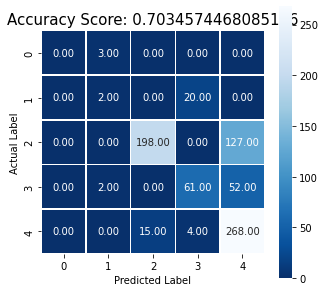

In [59]:
# CONFUSION MATRIX
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

plt.figure(figsize = (5,5))
sns.heatmap(cm, annot = True, fmt = ".2f", linewidths = 0.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)